In [1]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold
from scipy import sparse
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import euclidean_distances
import SemisupFns as SF
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import MiscFcns as MF
import seaborn as sns
import scipy.stats as ss
import mygene
from sklearn.preprocessing import StandardScaler
from scipy.stats.stats import pearsonr
%matplotlib inline

Text(0,0.5,'PC 2')

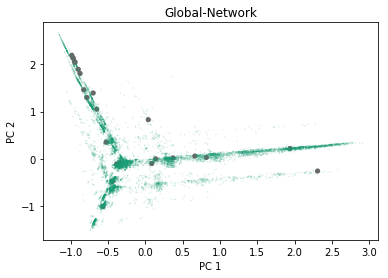

In [15]:
#Reading feature vector 
X = pd.read_csv('./amp_ad_agg_feature_set.csv')

#Dropping GeneID column 
GeneId = X['GeneID']
l = list(X)
X = X.drop(['GeneID'], axis = 1)
X = X.drop(l[0],axis = 1)
X.head()
X = X.fillna(0)


#drop certain brain regions 
#l = ['IFG','PHG','STG']
#l2 = list(X)

#for i in range(len(l2)):
#    for j in range(len(l)):
#        if l[j] in l2[i]:
#            X = X.drop([l2[i]],axis = 1)
#            break

    

#Reading response vector 
Y = pd.read_excel('./ResponseVec_040318.xlsx')
Y = Y.drop(['GeneID'], axis = 1)

#Y1 = pd.read_excel('./ResponseVec_SWB1000G.xlsx')
#Y1 = Y1.drop(['GeneID'], axis = 1)

#Y2 = pd.read_excel('./ResponseVec_LS.xlsx')
#Y2 = Y2.drop(['GeneID'], axis = 1)

#Y3 = pd.read_excel('./ResponseVec_SWB.xlsx')
#Y3 = Y3.drop(['GeneID'], axis = 1)

#Y4 = pd.read_excel('./ResponseVec_PA.xlsx')
#Y4 = Y4.drop(['GeneID'], axis = 1)

#Y = (Y1 + Y2 + Y3 + Y4)>0


#Performing dimensionality reduction using PCA to 2 dimensions 
pca = PCA(n_components=5)
X2 = X - X.min(axis = 0)
X2 = X2.abs()
X_normed = X.values / X2.values.max(axis=0)
pca.fit(X_normed)
X_pca = pca.fit_transform(X_normed)

In = np.where(X.sum(axis=1)!=0)[0]

#Coloring the known AD related genes differently 
plt.scatter(X_pca[In,0],X_pca[In,1], c = Y.values[In,0] , 
            s =(Y.values[In,0] +.5)**7, cmap = 'Dark2')
plt.title('Global-Network')
plt.xlabel('PC 1') 
plt.ylabel('PC 2')
#plt.savefig('PCA_rna_seq_DLPFC_LS.png')

/anaconda2/lib/python2.7/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


Text(0,0.5,'PC 2')

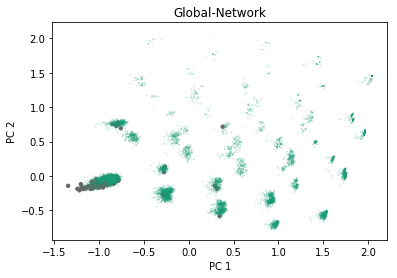

In [19]:
#Reading feature vector 
X = pd.read_csv('./amp_ad_subNet_feature_set.csv')

#Dropping GeneID column 
GeneId = X['GeneID']
l = list(X)
X = X.drop(['GeneID'], axis = 1)
X = X.drop(l[0],axis = 1)
X.head()
X = X.fillna(0)


#Reading response vector 
df = pd.read_csv('EC2_ICCT_subNet_de_agg_probs.csv')
Y =(df['Y0l']>0.9)*(df['Y1l']>0.9)*(df['Y3l']>0.9) + 0.0

#Performing dimensionality reduction using PCA to 2 dimensions 
pca = PCA(n_components=5)
X2 = X - X.min(axis = 0)
X2 = X2.abs()
X_normed = X.values / X2.values.max(axis=0)
pca.fit(X_normed)
X_pca = pca.fit_transform(X_normed)

In = np.where(X.sum(axis=1)!=0)[0]

#Coloring the known AD related genes differently 
plt.scatter(X_pca[In,0],X_pca[In,1], c = Y.values[In] , 
            s =(Y.values[In] +.5)**6, cmap = 'Dark2')
plt.title('Global-Network')
plt.xlabel('PC 1') 
plt.ylabel('PC 2')
#plt.savefig('PCA_rna_seq_DLPFC_LS.png')

In [8]:
X = pd.read_csv('./amp_ad_subNet_feature_set_GW.csv')

In [20]:
sum(Y)

147.0

In [10]:
X.shape

(14448, 42)

Text(0,0.5,'PC 2')

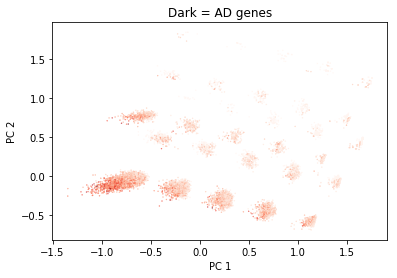

In [15]:
#plt.scatter(X_pca[:,0],X_pca[:,1], c = Y.values[:,0] , 
#            s =(X.TCXpagerank), cmap = 'Dark2')

plt.scatter(X_pca[:,0],X_pca[:,1], s = 0.1, 
            c =(X.TCXpagerank), cmap = 'Reds')

plt.title('Dark = AD genes')
plt.xlabel('PC 1') 
plt.ylabel('PC 2')

In [5]:
Dat = pd.read_csv('./EC2_ConsUnion1_NoDeProbs.csv')
Dat.head()
Y1a = Dat['Y1a']
Y1b = Dat['Y1b']
Y3a = Dat['Y3a']
Y3b = Dat['Y3b']
#bla = ((Y1a>0.5) + (Y1b>0.5) + (Y3a>0.5) + (Y3b>0.5)) + 0
bla = ((Y1a>0.5) + (Y3a>0.5) ) 

/anaconda2/lib/python2.7/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [14]:
X.shape

(14448, 42)

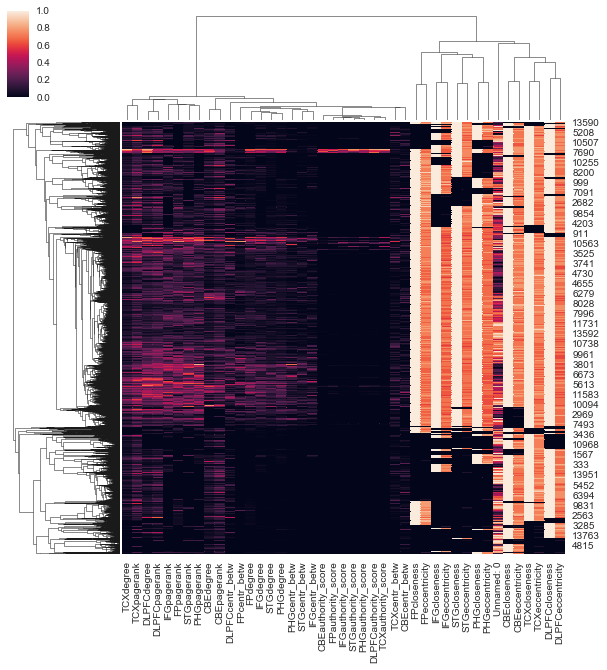

In [37]:
import seaborn as sns; sns.set(color_codes=True)
g = sns.clustermap(X, standard_scale= 1, row_cluster=True, col_cluster= True)

In [6]:
#Getting list of genes which have SNPs according to IGAP_stage1
cnt = 0 
GeneNames = []
MinPval = []
AvgLogPval = []
with open("/Users/sumitmukherjee/Documents/AMP-AD_Network_Analysis/IGAP_files/IGAP_geneAnalysis.genes.raw") as f:
    for line in f:
        if cnt <= 1:
            cnt+=1 
            continue
            
        cnt += 1
        temp = line.split(' ')

        if len(temp)>9:
            GeneNames += [temp[0]]
            temp = map(float,temp[9:])
            MinPval += [min(temp)]
            AvgLogPval += [np.mean(np.log10(temp))]


In [7]:
#Getting the ENSEMBL ID's of the predicted regulator genes
GenePred = list(GeneId[bla])
GenePredVal = list(Y1a[bla])
#Converting to Gene Symbols 
GenePred2 = MF.ConvertToSymb(GenePred)

querying 1-1000...done.
querying 1001-1540...done.
Finished.
2 input query terms found dup hits:
	[(u'ENSG00000133816', 2), (u'ENSG00000143226', 2)]
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [8]:
len(GenePred)

1540

In [9]:
def PredGenesPval(IGAP_genes,GenePred, GenePredVal):
    Int = list(set(IGAP_genes['Genes']).intersection(GenePred))
    GenePred = pd.DataFrame({'G':GenePred})
    
    G = [] 
    P = []
    Pmean = []
    Ind = []
    
    for i in range(len(Int)):
        In = IGAP_genes['Genes'][IGAP_genes['Genes']==Int[i]].index[0]
        In2 = GenePred['G'][GenePred['G']==Int[i]].index[0]
        G += [IGAP_genes['Genes'][In]]
        P += [IGAP_genes['Pval'][In]]
        Pmean += [IGAP_genes['MeanPval'][In]]
        Ind += [In2]
        
        
    PredGenes_pval = pd.DataFrame(data = {'GeneSymb':G,'Pval':P,'MeanPval':Pmean,'Ind':Ind})
    return PredGenes_pval

In [10]:
IGAP_genes = pd.DataFrame(data = {'Genes':GeneNames,'Pval':MinPval,'MeanPval':AvgLogPval})
#Getting p-values of predicted genes 
PredGenes_pval = PredGenesPval(IGAP_genes,GenePred2, GenePredVal)
PredGenes_pval.head()

,GeneSymb,Ind,MeanPval,Pval
0,RNF14,72,-2.487667,0.000183
1,PGM2L1,1255,-1.905722,0.000212
2,ZNF708,1409,-2.204050,0.000216
3,CAMK1,901,-1.885742,0.000765
4,CAMK4,1142,-2.129034,0.000092


In [118]:
def ConvertToEnsb(GeneNames,GeneId):
    #GenePred - 1-d Python List
    mg = mygene.MyGeneInfo()
    temp = mg.querymany(GeneNames , scopes='symbol', fields='ensembl.gene', species='human')
    GeneNamesEnsb = []
    GeneNamesNew = []
    Ind1 = []
    Ind2 = []
    GeneId = list(GeneId)
    for i in range(len(GeneNames)):
        if 'ensembl' in list(temp[i]):
            if len(temp[i]['ensembl'])==1:
                temp2 = str(temp[i]['ensembl']['gene'])
            else:
                temp2 = str(temp[i]['ensembl'][0]['gene'])
            #print temp2
            if temp2 in GeneId:
                GeneNamesEnsb += [temp2]
                GeneNamesNew += [GeneNames[i]]
                Ind1 += [i]
                Ind2 += [int(np.where(np.array(GeneId) == temp2)[0])]
    
    #print GeneNamesNew
    D = {'Symbol':GeneNamesNew, 'Ensembl':GeneNamesEnsb, 'Ind1':Ind1, 'Ind2':Ind2}
    return D

In [119]:
tmp = ConvertToEnsb(GeneNames,GeneId)
pd.DataFrame(tmp).head()

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-17813...done.
Finished.
116 input query terms found dup hits:
	[(u'OVCH1', 2), (u'C3orf79', 2), (u'TXNRD3NB', 2), (u'C10orf91', 2), (u'C1orf137', 2), (u'CCDC154', 
572 input query terms found no hit:
	[u'FAM132A', u'CPSF3L', u'LOC100506504', u'C1orf86', u'APITD1', u'APITD1-CORT', u'PTCHD2', u'C1orf64
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


,Ensembl,Ind1,Ind2,Symbol
0,ENSG00000187608,0,11652,ISG15
1,ENSG00000188157,1,11708,AGRN
2,ENSG00000131591,3,5105,C1orf159
3,ENSG00000078808,7,1220,SDF4
4,ENSG00000176022,8,10396,B3GALT6


In [117]:
#mg = mygene.MyGeneInfo()
#temp = mg.querymany(GeneNames[30:50] , scopes='symbol', fields='ensembl.gene', species='human')
#len(temp[9]['ensembl'])

In [120]:
temp2 = pd.DataFrame(tmp)
temp2.shape

(11625, 4)

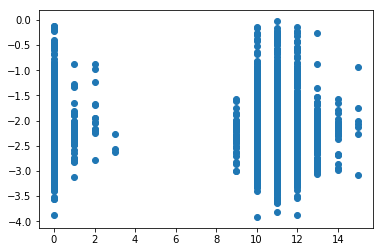

In [158]:


plt.scatter(X.values[list(temp2['Ind2']),22],np.array(AvgLogPval)[list(temp2['Ind1'])])

In [181]:

CArr = []
for i in range(len(list(X))):
    
    #t = pearsonr(X.values[list(temp2['Ind2']),i],
     #                    np.array(AvgLogPval)[list(temp2['Ind1'])])
    t,n = ss.spearmanr(X.values[list(temp2['Ind2']),i],
                 np.array(AvgLogPval)[list(temp2['Ind1'])])
    CArr += [t]
print CArr    

[0.00028741159809271457, 0.015138191311047336, 0.011757239386856211, 0.011069029718175468, 0.0058374075420825275, 0.008387496096682039, 0.012796885027860205, -0.008985616861043549, -0.0016478984309651037, -0.006719519426803285, 0.007351470250491741, -0.013668492098805782, -0.011796124657994657, 0.001982511663166918, 0.010387978989843607, 0.000834203132515046, 0.0043327214872258, 0.00121149362735648, 0.0034325580448991157, 0.0030082293155171886, -0.0039040738356241854, -0.005327185934289453, -0.00620276430799466, 0.0017016102934854357, 0.005960053456992013, -0.0016141059484303312, -0.0012621734959209114, -0.005591941950906705, -0.014813840718198211, 0.00211242414423561, 0.0011520883176045341, -0.0003633632974220126, -0.0006087613606203298, -0.00550948808377019, -0.0047566932806988056, -0.00012042832002400214, 0.0005149697999915283, -0.006790809540628449, -0.00914031287859599, -0.010228214513481212, -0.009798648883997922, -0.004599617641104768, -0.004831466461861074]


(array([2., 5., 3., 7., 6., 9., 4., 2., 3., 2.]),
 array([-0.01481384, -0.01181864, -0.00882343, -0.00582823, -0.00283303,
         0.00016218,  0.00315738,  0.00615258,  0.00914778,  0.01214299,
         0.01513819]),
 <a list of 10 Patch objects>)

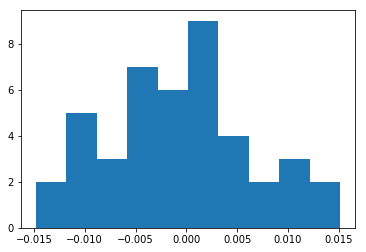

In [182]:
plt.hist(CArr)

In [178]:
t

(-0.005094404348137932, 0.5828547722130074)

In [50]:
mg = mygene.MyGeneInfo()
tmp = mg.querymany(GeneNames , scopes='symbol', fields='ensembl.gene', species='human')

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-17813...done.
Finished.
116 input query terms found dup hits:
	[(u'OVCH1', 2), (u'C3orf79', 2), (u'TXNRD3NB', 2), (u'C10orf91', 2), (u'C1orf137', 2), (u'CCDC154', 
572 input query terms found no hit:
	[u'FAM132A', u'CPSF3L', u'LOC100506504', u'C1orf86', u'APITD1', u'APITD1-CORT', u'PTCHD2', u'C1orf64
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [42]:
tmp[0]['ensembl']['gene']

u'ENSG00000187608'

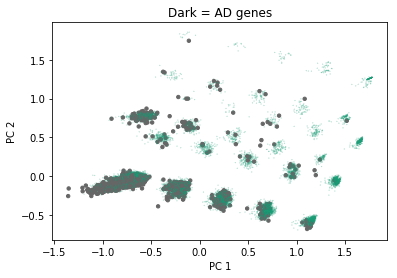

In [35]:
#Coloring the predicting AD related genes differently 
plt.scatter(X_pca[:,0],X_pca[:,1], c = bla , 
            s =(bla +.5)**6, cmap = 'Dark2')
plt.title('Dark = AD genes')
plt.xlabel('PC 1') 
plt.ylabel('PC 2')
plt.savefig('PCA_subNet_pred.png')

1147